# Smoothed Autocorrelation Function for Rotation Periods

Roughly following the prescription in McQuillan et al. (2013), but approximating the uncertainty in rotation period differently.


### Method

To measure rotation period: 

* normalize and median subtract fluxes of each quarter
* interpolate over missing data
* measure autocorrelation function
* smooth autocorrelation function with gaussian convolution as in McQuillan et al. (2013)
* measure period at primary peak of smoothed ACF
* take the median quarterly period is the true period, use standard deviation of quarterly periods as uncertainty

### HAT-P-11

In [59]:
%matplotlib inline

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from glob import glob
import os

# Import dev version of friedrich:
import sys
from friedrich.lightcurve import (LightCurve, hat11_params_morris, k17_params_morris,
                                  concatenate_light_curves)
from friedrich.fitting import peak_finder, summed_gaussians, run_emcee_seeded
from scipy.ndimage import gaussian_filter
import numpy as np

# Settings:
if os.path.exists('/Users/bmmorris/data/hat11/'):
    # on laptop:
    light_curve_paths = glob('/Users/bmmorris/data/hat11/*slc.fits')
    output_dir = os.path.abspath('/Users/bmmorris/data')
else:
    raise ValueError('No input files found.')

depth = 0.00343
hat11_params = hat11_params_morris()

# Construct light curve object from the raw data
whole_lc = LightCurve.from_raw_fits(light_curve_paths, name='HAT11')
whole_lc = LightCurve(**whole_lc.mask_in_transit(hat11_params,
                                                 oot_duration_fraction=0.5)
                     )

# Compute maxes for each quarter
available_quarters = whole_lc.get_available_quarters()
quarters = [whole_lc.get_quarter(q) for q in whole_lc.get_available_quarters()]

for quarter in quarters:
    quarter.errors /= np.median(quarter.fluxes)
    quarter.fluxes /= np.median(quarter.fluxes)
    
normalized_lc = concatenate_light_curves(quarters)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/interpacf-0.1-py3.5.egg/interpacf/interpacf.py:172: NoPeriodFoundWarning: No period found. Be sure to check limits and to median-subtract your fluxes.


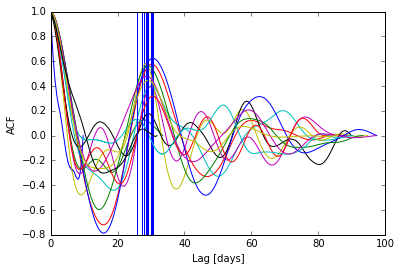

In [3]:
import interpacf
import matplotlib.pyplot as plt

periods = []
for quarter in quarters:
    if quarter != 0:
        lag, acf = interpacf.interpolated_acf(quarter.times.jd, 
                                              quarter.fluxes - np.median(quarter.fluxes))
        detected_period = interpacf.dominant_period(lag, acf, min=20, max=40)

        plt.plot(lag, acf/np.max(acf))
        plt.axvline(detected_period)
        periods.append(detected_period)
        plt.xlabel('Lag [days]')
        plt.ylabel('ACF')

In [68]:
print("HAT-P-11 rotation period = {0} +/- {1}"
      .format(np.nanmedian(periods), np.nanstd(periods)))

HAT-P-11 rotation period = 29.194126768969 +/- 1.3238218890659685


### Kepler-17

In [60]:
# Settings:
if os.path.exists('/Users/bmmorris/data/kepler17/'):
    # on laptop:
    light_curve_paths = glob('/Users/bmmorris/data/kepler17/*slc.fits')
    output_dir = os.path.abspath('/Users/bmmorris/data')
else:
    raise ValueError('No input files found.')

depth = 0.00343
k17_params = k17_params_morris()

# Construct light curve object from the raw data
whole_lc = LightCurve.from_raw_fits(light_curve_paths, name='K17')
whole_lc = LightCurve(**whole_lc.mask_in_transit(k17_params,
                                                 oot_duration_fraction=0.5)
                     )

# Compute maxes for each quarter
available_quarters = whole_lc.get_available_quarters()
quarters = [whole_lc.get_quarter(q) for q in whole_lc.get_available_quarters()]

for quarter in quarters:
    quarter.errors /= np.median(quarter.fluxes)
    quarter.fluxes /= np.median(quarter.fluxes)
    
normalized_lc = concatenate_light_curves(quarters)

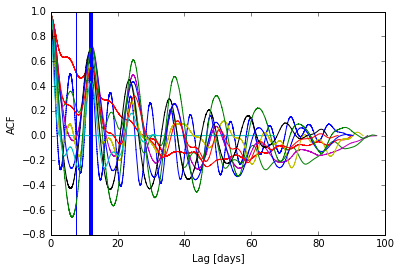

In [63]:

k17periods = []
for quarter in quarters:
    if quarter != 0:
        lag, acf = interpacf.interpolated_acf(quarter.times.jd, 
                                              quarter.fluxes - np.median(quarter.fluxes))
        detected_period = interpacf.dominant_period(lag, acf, min=5, max=15)

        plt.plot(lag, acf/np.max(acf))
        plt.axvline(detected_period)
        k17periods.append(detected_period)
        plt.xlabel('Lag [days]')
        plt.ylabel('ACF')

In [67]:
print("Kepler-17 rotation period = {0} +/- {1}"
      .format(np.nanmedian(k17periods), np.nanstd(k17periods)))

Kepler-17 rotation period = 12.043456287123263 +/- 1.3188058169644357
